# Data Cleaning 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/drive/My Drive/Datasets/loan_sanction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Dealing with missing values

In [ ]:
# Checking for null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Imputing with mode for Categorical features

df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])


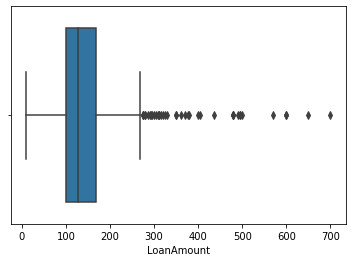

In [ ]:
# Checking for outliers in quantitative feature Dependents.
# using seaborn

sns.boxplot(x = df['LoanAmount'])


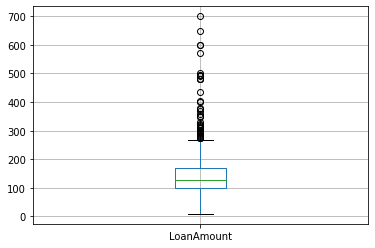

In [ ]:
# Checking for outliers in quantitative feature Dependents.
# using matplotlib

df.boxplot(column='LoanAmount')

In [ ]:
# Imputing with median for Quantitative feature.

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

# Data Exploration

Separate lists of numerical and Categorical columns.

In [ ]:
cat_features = [col for col in df.columns if df[col].dtype == 'O']
num_features = [col for col in df.columns if df[col].dtype != 'O']
print('Data has {} Categorical features : {}'.format(len(cat_features),cat_features))
print('Data has {} numerical features : {}'.format(len(num_features),num_features))

Data has 8 Categorical features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Data has 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Summary Statics 

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
df.mean()

<ipython-input-64-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            145.752443
Loan_Amount_Term      342.410423
Credit_History          0.855049
dtype: float64

In [ ]:
df.median()

<ipython-input-66-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [ ]:
df.mode().head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Yes,0,Graduate,No,2500.0,0.0,128.0,360.0,1.0,Semiurban,Y


In [ ]:
df.var()

<ipython-input-84-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+03
Loan_Amount_Term     4.151048e+03
Credit_History       1.241425e-01
dtype: float64

In [ ]:
df.std()

<ipython-input-73-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             84.107233
Loan_Amount_Term       64.428629
Credit_History          0.352339
dtype: float64

In [ ]:
df.quantile(q=0.25)

ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.25, dtype: float64

In [ ]:
df.quantile(q=0.75)

ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64

5 number Summary

In [ ]:
df.describe().loc[['min','25%', '50%', '75%', 'max']]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
min,150.0,0.00,9.00,12.0,0.0
25%,2877.5,0.00,100.25,360.0,1.0
50%,3812.5,1188.50,128.00,360.0,1.0
75%,5795.0,2297.25,164.75,360.0,1.0
max,81000.0,41667.00,700.00,480.0,1.0


In [ ]:
df.cov()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,3.732039e+07,-2.084490e+06,290397.998060,-18314.518335,-40.068717
CoapplicantIncome,-2.084490e+06,8.562930e+06,46570.025909,-11195.741238,11.479406
LoanAmount,2.903980e+05,4.657003e+04,7074.026707,200.284477,-0.017998
Loan_Amount_Term,-1.831452e+04,-1.119574e+04,200.284477,4151.048244,-0.106806
Credit_History,-4.006872e+01,1.147941e+01,-0.017998,-0.106806,0.124142


In [ ]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


# Data Visualization


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Univariate Analysis 

Numerical Variable

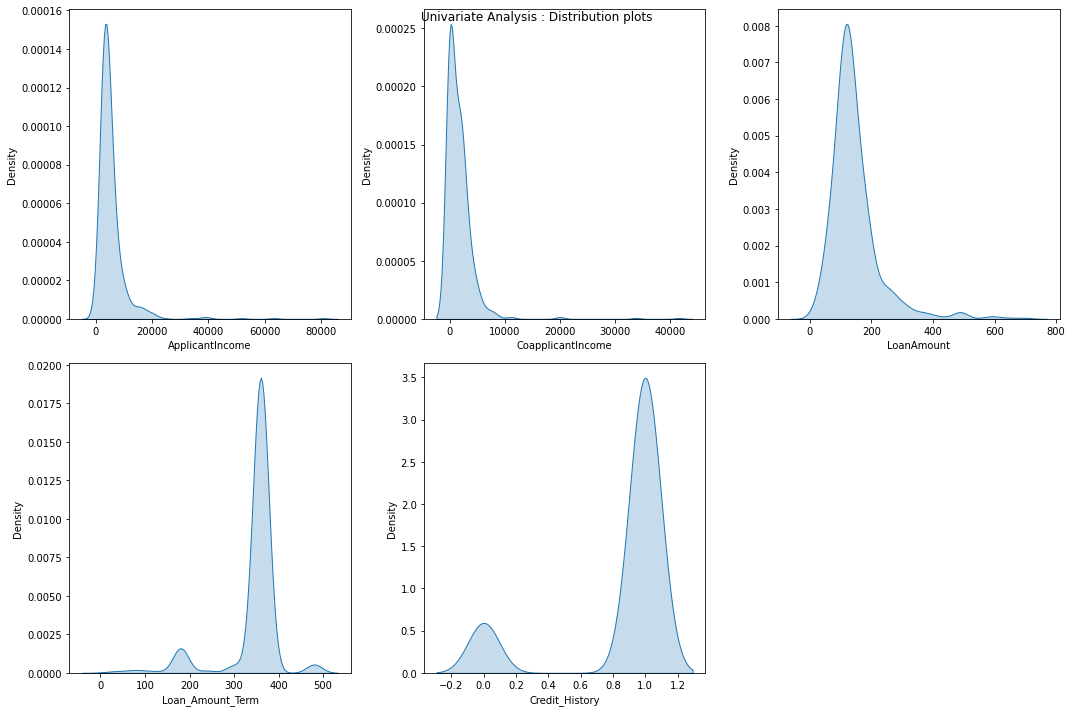

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis : Distribution plots')
for i in range(0, len(num_features)):
  plt.subplot(2,3,i+1)
  sns.kdeplot(x=df[num_features[i]], fill=True)
  plt.tight_layout()


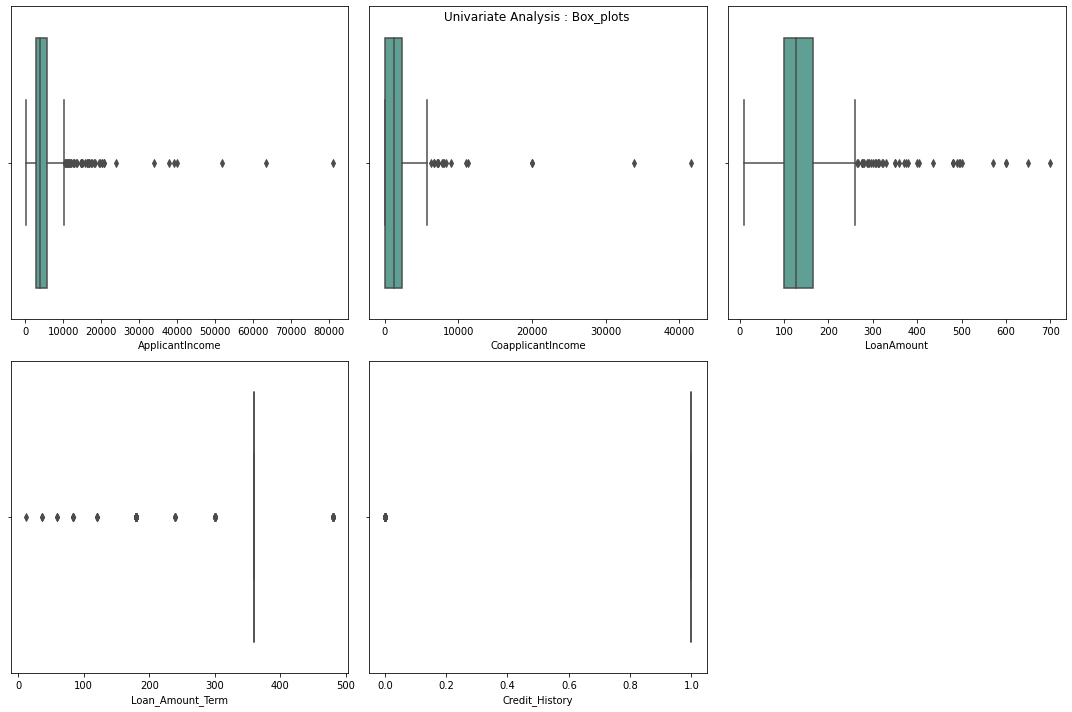

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis : Box_plots')
for i in range(0, len(num_features)):
  plt.subplot(2,3,i+1)
  sns.boxplot(x=df[num_features[i]], palette="dark:#5A9_r")
  plt.tight_layout()

Categorical Variable

In [ ]:
Cat_features = [x for x in cat_features if x not in ['Loan_Status','Loan_ID']]

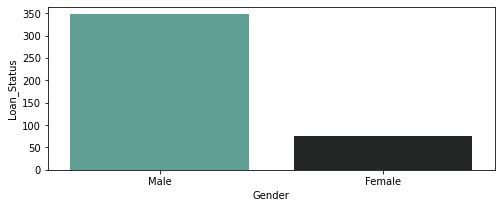

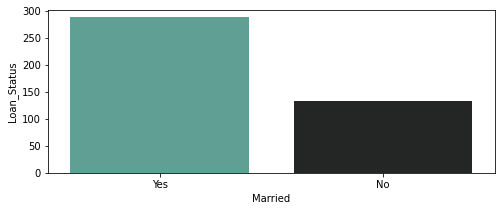

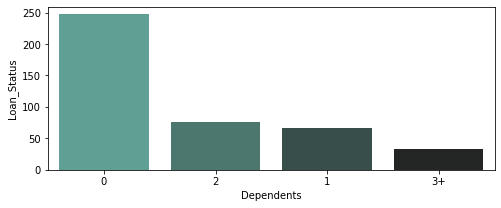

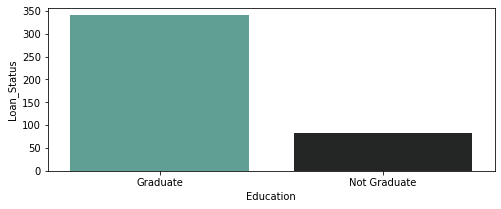

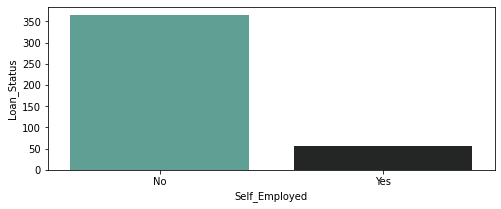

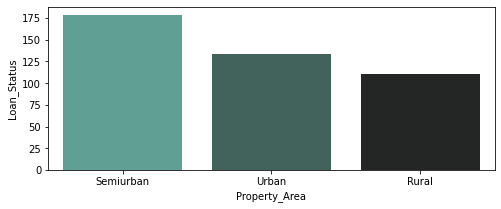

In [ ]:
for i in range(0,len(Cat_features)):
  df_cat = df[df['Loan_Status']=='Y'].groupby(Cat_features[i]).Loan_Status.count().reset_index().sort_values(by='Loan_Status', ascending=False)
  plt.figure(figsize=(8,3))
  sns.barplot(data=df_cat, x=Cat_features[i], y ='Loan_Status', ci=None, palette="dark:#5A9_r")
  plt.xlabel(Cat_features[i])


In [ ]:
#df_gender = df.groupby(['Gender','Loan_Status']).count().reset_index()
s#ns.barplot(data=df_gender, x='Gender', y='Loan_ID', hue='Loan_Status', palette='dark:#5A9_r')

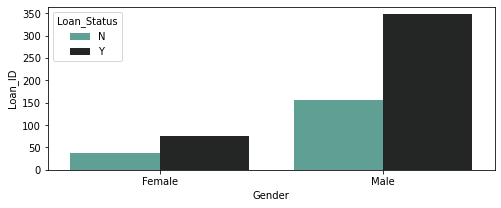

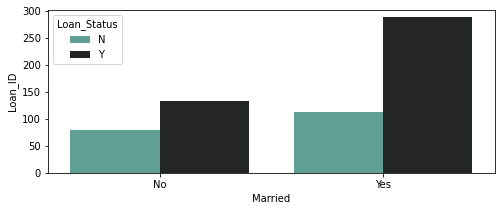

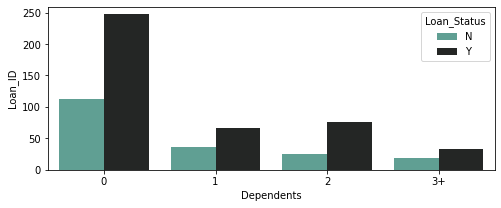

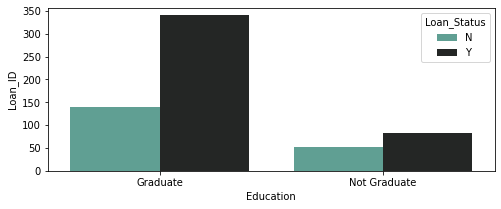

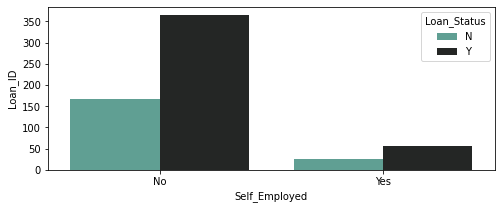

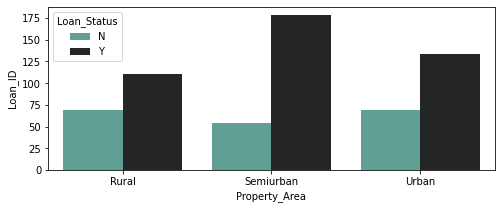

In [ ]:
for i in range(0,len(Cat_features)):
  df_cat1 = df.groupby([Cat_features[i],'Loan_Status']).count().reset_index()
  plt.figure(figsize=(8,3))
  sns.barplot(data=df_cat1, x=Cat_features[i], y ='Loan_ID', hue='Loan_Status', palette="dark:#5A9_r")
  plt.xlabel(Cat_features[i])

In [ ]:
df.groupby(['Property_Area','Loan_Status']).count().reset_index()

,Property_Area,Loan_Status,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Rural,N,69,69,69,69,69,69,69,69,69,69,69
1,Rural,Y,110,110,110,110,110,110,110,110,110,110,110
2,Semiurban,N,54,54,54,54,54,54,54,54,54,54,54
3,Semiurban,Y,179,179,179,179,179,179,179,179,179,179,179
4,Urban,N,69,69,69,69,69,69,69,69,69,69,69
5,Urban,Y,133,133,133,133,133,133,133,133,133,133,133




*   For both the gender, more than 60% of applicants loan have approved. So, Gender does not affect the Loan approvaL.
*   Applicant who have less dependents are more likely to get a loan approval.
*   Applicant who are graduate are more likely to get a loan approval.
*   Rural property area are less likely to get loan approval.






In [ ]:
df[df['Loan_Status']=='Y'].groupby('Dependents').count()['Loan_Status']

Dependents
0     247
1      66
2      76
3+     33
Name: Loan_Status, dtype: int64

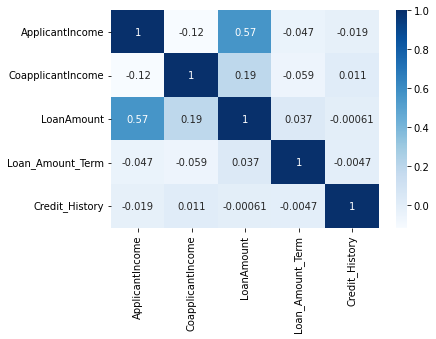

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

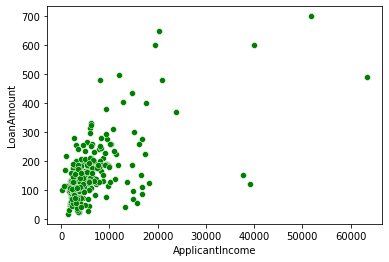

In [ ]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df[df['Loan_Status']=='Y'], color='Green')

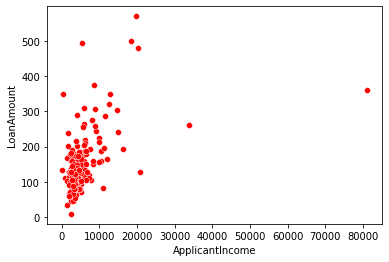

In [ ]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df[df['Loan_Status']=='N'],color='red')